In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def frecuencia_natural(path, time1=10):
    tabla = pd.read_csv(path, sep="\t", names=["tiempo", "posición"])

    # Filtrar datos hasta el tiempo especificado
    tabla_filtrada = tabla[tabla["tiempo"] <= time1]

    # Datos de tiempo y posición filtrados
    tiempo = tabla_filtrada["tiempo"].values
    posicion = tabla_filtrada["posición"].values

    # Definir la función de ajuste incluyendo la frecuencia como parámetro
    def ajuste_func(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)

    # Realizar el ajuste, especificando 4.7 como semilla para la frecuencia
    params, _ = curve_fit(ajuste_func, tiempo, posicion, p0=[1, 0.1, 4.7, 0])

    # Obtener los parámetros ajustados
    A, B, frecuencia, phi = params
    print(f"A = {A}, B = {B}, frecuencia = {frecuencia}, phi = {phi}")

    # Generar la función ajustada en el intervalo de tiempo
    tiempo_ajustado = np.linspace(0, time1, 1000)  # Más puntos para una mejor resolución de picos
    posicion_ajustada = ajuste_func(tiempo_ajustado, A, B, frecuencia, phi)

    # Encontrar todos los picos
    picos, _ = find_peaks(posicion_ajustada)

    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    # Calcular delta para cada par de picos consecutivos
    deltas = []
    for i in range(len(valores_picos) - 1):
        delta = np.log(valores_picos[i] / valores_picos[i + 1])
        deltas.append(delta)
        print(f"Delta entre pico {i+1} y pico {i+2}: {delta:.4f}")

    # Calcular el promedio de todos los deltas
    promedio_delta = np.mean(deltas)
    print("Promedio de delta:", promedio_delta)

    # Calcular el coeficiente de amortiguamiento xhi usando el promedio de delta
    xhi = promedio_delta / (np.sqrt(4 * np.pi**2 + promedio_delta**2))
    frecuencia_natural = B / xhi
    print("xhi:", xhi)
    print("frecuencia natural (rad/s):", frecuencia_natural)
    print("nu natural (Hz):", frecuencia_natural / (2 * np.pi))

    # Graficar los datos, el ajuste y los picos
    plt.plot(tabla["tiempo"], tabla["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()


A = 1.3003078555966965, B = 0.3291688713031324, frecuencia = 4.696692795697777, phi = -1.8586901403562197
Delta entre pico 1 y pico 2: 0.0779
Delta entre pico 2 y pico 3: 0.0621
Delta entre pico 3 y pico 4: 0.0716
Delta entre pico 4 y pico 5: 0.0735
Delta entre pico 5 y pico 6: 0.0647
Delta entre pico 6 y pico 7: 0.0742
Delta entre pico 7 y pico 8: 0.0690
Delta entre pico 8 y pico 9: 0.0672
Delta entre pico 9 y pico 10: 0.0767
Delta entre pico 10 y pico 11: 0.0646
Delta entre pico 11 y pico 12: 0.0698
Delta entre pico 12 y pico 13: 0.0766
Delta entre pico 13 y pico 14: 0.0628
Delta entre pico 14 y pico 15: 0.0724
Delta entre pico 15 y pico 16: 0.0721
Delta entre pico 16 y pico 17: 0.0654
Delta entre pico 17 y pico 18: 0.0749
Delta entre pico 18 y pico 19: 0.0677
Delta entre pico 19 y pico 20: 0.0680
Delta entre pico 20 y pico 21: 0.0775
Delta entre pico 21 y pico 22: 0.0632
Delta entre pico 22 y pico 23: 0.0706
Delta entre pico 23 y pico 24: 0.0753
Delta entre pico 24 y pico 25: 0.0636

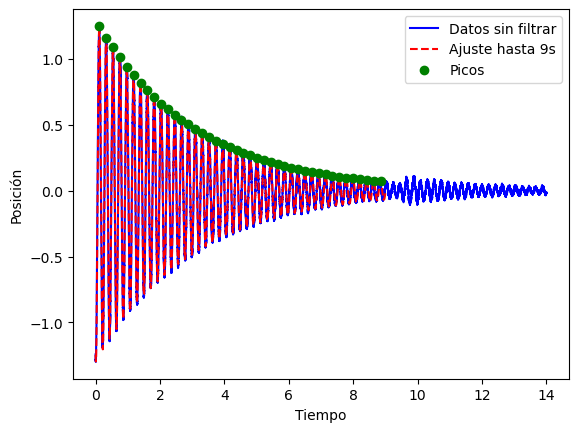

In [5]:
frecuencia_natural(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-58-18)\DataRecor2.csv",9)